2


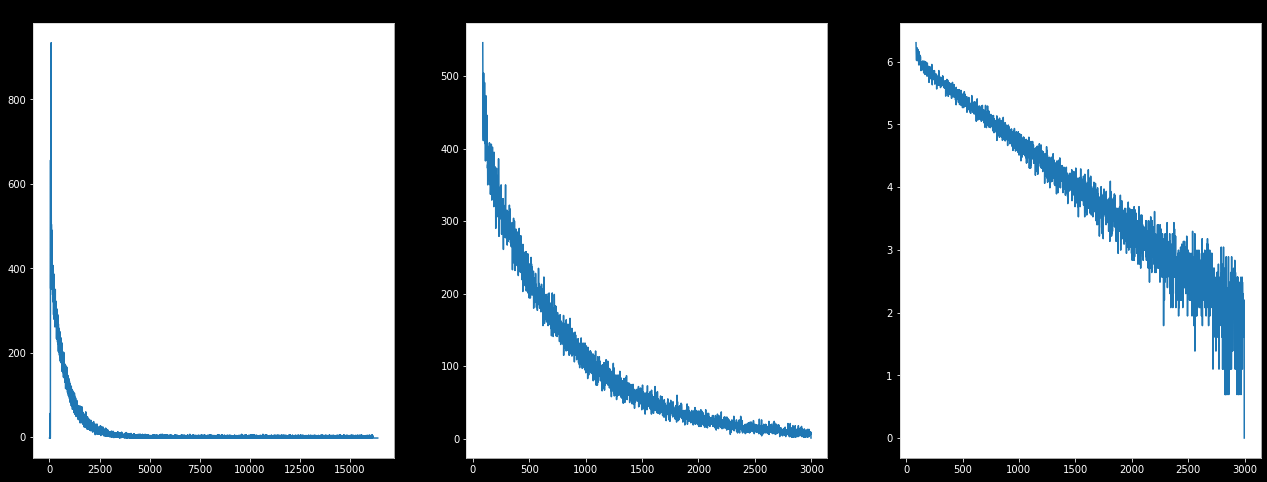

(2910,)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({
    "lines.color": "white",
    "patch.edgecolor": "white",
    "text.color": "black",
    "axes.facecolor": "white",
    "axes.edgecolor": "lightgray",
    "axes.labelcolor": "white",
    "xtick.color": "white",
    "ytick.color": "white",
    "grid.color": "lightgray",
    "figure.facecolor": "black",
    "figure.edgecolor": "black",
    "savefig.facecolor": "black",
    "savefig.edgecolor": "black"})

data = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        data[i] += int(f.readline())

    f.close()

addData("0227_Data.Spe")
addData("0306_Data.Spe")
addData("0308_Data.Spe")
addData("0315_Data.Spe")
addData("0403_Data.Spe")


left_chop = 88
right_chop = np.where(data[left_chop:] == 0)[0][0]

background = int(data[right_chop:].mean())
print(background)

data = data - background

right_chop = np.where(data[left_chop:] == 0)[0][0]

bins = np.arange(0, 16384, 1)

bins_chopped = bins[left_chop:right_chop]
data_chopped = data[left_chop:right_chop]

log_data_chopped = np.log(data_chopped)

fig, axes = plt.subplots(1, 3, figsize = (22, 8))

axes[0].plot(bins, data)
axes[1].plot(bins_chopped, data_chopped)
axes[1].set_title("Counts per Channel (Chopped)")
axes[2].plot(bins_chopped, log_data_chopped)
plt.show()

print(data_chopped.shape)


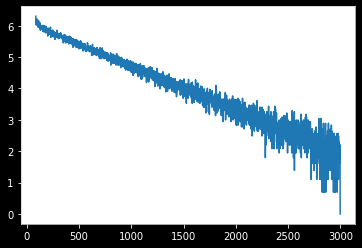

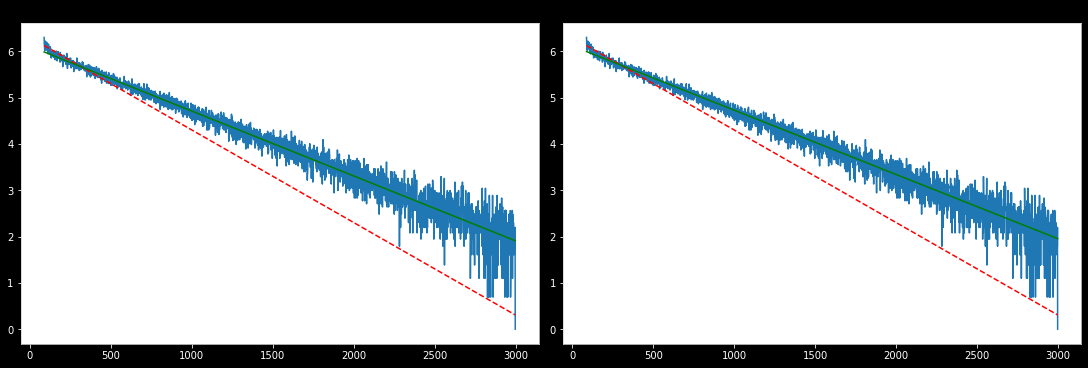

Weighted lifetime (1 channel per bin): 720.0
σ: 0.11073611075560785, Avg: 3.9503221631016374, σ/avg: 0.028032172107366103


In [2]:
from scipy.optimize import curve_fit

fig, ax = plt.subplots()
ax.plot(bins_chopped,log_data_chopped)
plt.show()
#chopRight = 5000
p0 = (log_data_chopped[0], -1/500)
def func_lin(t,p0, p1):
    return p0+p1*t

fig, axs = plt.subplots(1,2, figsize = (15,5),constrained_layout = True)
axs[0].set_title("Unweighted")
axs[0].plot(bins_chopped,log_data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0)
axs[0].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[0].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Unweighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[0].set_title(title)

axs[1].plot(bins_chopped,log_data_chopped)

sigmas = 1/np.sqrt(data_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped, log_data_chopped, p0, sigma = sigmas)
axs[1].plot(bins_chopped,func_lin(bins_chopped,*p0), '--r')
axs[1].plot(bins_chopped,func_lin(bins_chopped,*popt), '-g')
title = "Weighted lifetime (channels): {:5.1f}".format(-1/popt[1])
axs[1].set_title(title)
plt.show()
print("Weighted lifetime (1 channel per bin): {:5.1f}".format(-1/popt[1]))

lifetime1 = -1/popt[1]

sum = 0
total = np.sum(data_chopped)
for i in range(len(bins_chopped)):
    sum += ((log_data_chopped[i] - func_lin(bins_chopped[i], *popt)) ** 2) * (data_chopped[i] / total)


sigma = np.sqrt(sum)

sum = 0
for i in range(len(bins_chopped)):
    sum += log_data_chopped[i]
avgData = sum / len(bins_chopped)

print(f"σ: {sigma}, Avg: {avgData}, σ/avg: {sigma/avgData}")

dataUncertainty = sigma/avgData



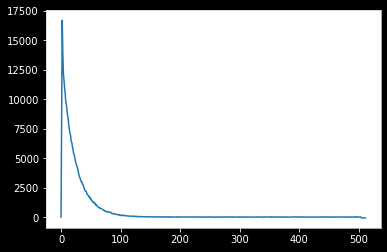

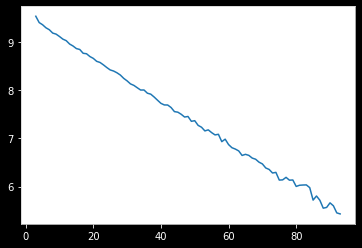

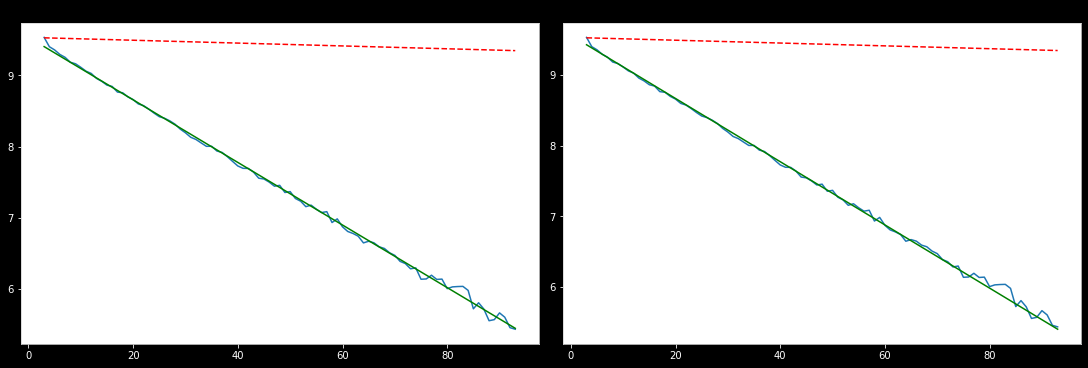

Weighted lifetime (32 channels per bin): 714.834
σ: 0.03431748675333851, Avg: 7.425200595357023, σ/avg: 0.004621758875416407


In [3]:
data32 = data.reshape(-1, 32).sum(axis = 1)

bins = np.arange(0, len(data32))


fig, ax = plt.subplots()
ax.plot(bins, data32)
plt.show()

from scipy.optimize import curve_fit

left_chop32 = int(left_chop / 32) + 1
right_chop32 = int(right_chop / 32) + 1

data32_chopped = data32[left_chop32:right_chop32]
logData32_chopped = np.log(data32_chopped)
bins_chopped32 = bins[left_chop32:right_chop32]

fig, ax = plt.subplots()
ax.plot(bins_chopped32, logData32_chopped)
plt.show()

p0 = (logData32_chopped[0], -1/500)
def func_lin(t,p0, p1):
    return p0+p1*t
bins_chopped32
fig, axs = plt.subplots(1,2, figsize = (15,5),constrained_layout = True)
axs[0].set_title("Unweighted")
axs[0].plot(bins_chopped32,logData32_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped32, logData32_chopped, p0)
axs[0].plot(bins_chopped32,func_lin(bins_chopped32,*p0), '--r')
axs[0].plot(bins_chopped32,func_lin(bins_chopped32,*popt), '-g')
title = "Unweighted lifetime (channels): {:5.3f}".format(-1/popt[1])
axs[0].set_title(title)

axs[1].plot(bins_chopped32,logData32_chopped)


sigmas = 1/np.sqrt(data32_chopped)
popt, pcov = curve_fit(func_lin, bins_chopped32, logData32_chopped, p0, sigma = sigmas)
axs[1].plot(bins_chopped32,func_lin(bins_chopped32,*p0), '--r')
axs[1].plot(bins_chopped32,func_lin(bins_chopped32,*popt), '-g')
title = "Weighted lifetime (channels): {:5.3f}".format(-32/popt[1])
axs[1].set_title(title)
plt.show()
print("Weighted lifetime (32 channels per bin): {:5.3f}".format(-32/popt[1]))

lifetime32 = -32/popt[1]

sum = 0
total = np.sum(data32_chopped)
for i in range(len(bins_chopped32)):
    sum += ((logData32_chopped[i] - func_lin(bins_chopped32[i], *popt)) ** 2) * (data32_chopped[i] / total)

sigma = np.sqrt(sum)
sum = 0
for i in range(len(bins_chopped32)):
    sum += logData32_chopped[i]
avgData = sum / len(bins_chopped32)

print(f"σ: {sigma}, Avg: {avgData}, σ/avg: {sigma/avgData}")

dataUncertainty32 = sigma/avgData


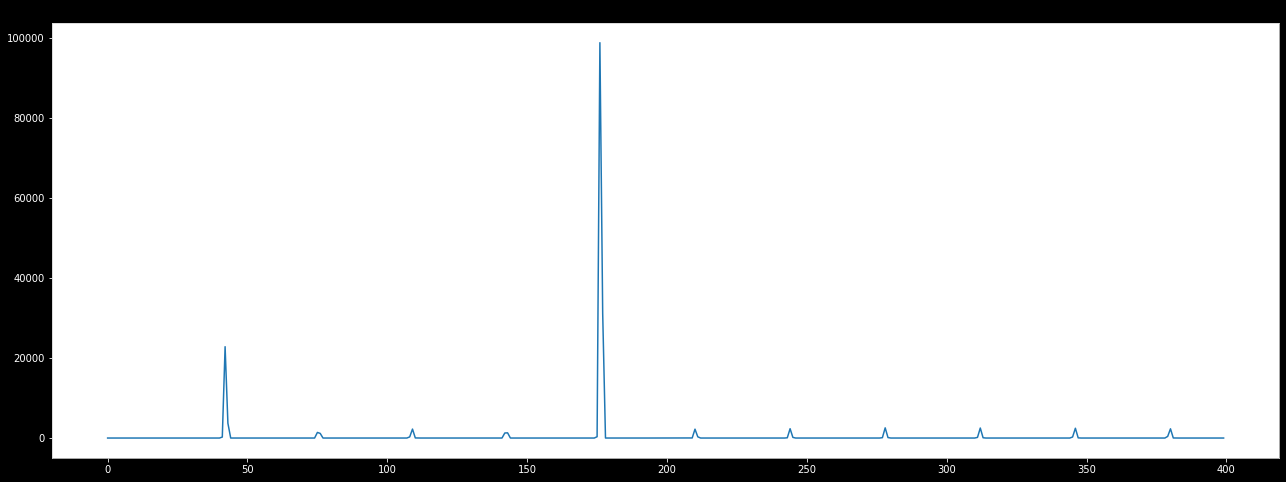

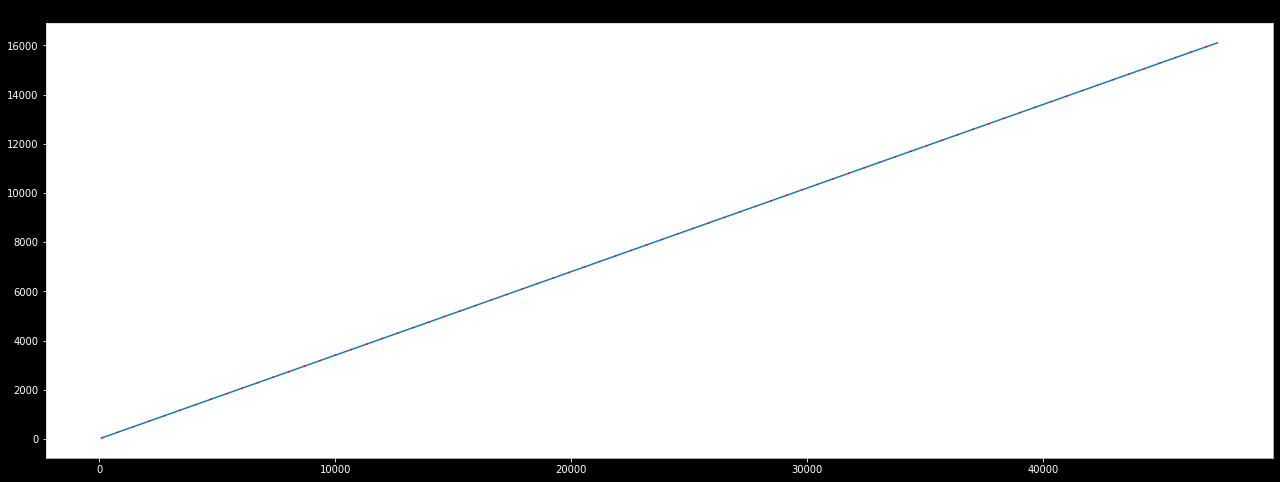

Peak Avg Dist: 33.9556 chnls, Peak Dist Std: 0.2060 chnls
Time per channel: 2.9439 ns, σ = 0.0179 ns


In [4]:
from scipy.signal import find_peaks

calibrationData = np.zeros((16384), np.int32)

def addData(path):
    f = open(path, "r")
    for i in range(12):
        f.readline()

    for i in range(16383):
        calibrationData[i] += int(f.readline())

    f.close()

addData("0301_calibration1.Spe")

bins = np.arange(0, 16384)

fig, ax = plt.subplots(1, 1, figsize = (22, 8))

ax.plot(bins[:400], calibrationData[:400])
ax.set_title("First 400 channels of Calibration data")
plt.show()

peaks, _ = find_peaks(calibrationData, height = 500, threshold=0.5)
peaks_df = calibrationData[peaks][:]

time_intervals = np.arange(100, 50000, 100)[:len(peaks)]

p0 = (peaks[0], 16384.0 / 50000.0)
def func_lin(t,p0, p1):
    return p0+p1*t

popt, pcov = curve_fit(func_lin, time_intervals, peaks, p0)

fig, ax = plt.subplots(1, 1, figsize = (22, 8))

ax.plot(time_intervals, peaks)
ax.set_title("Time Interval Length vs Channel Number")
ax.plot(time_intervals,func_lin(time_intervals,*popt), linestyle=(0, (1, 10)), color='red')
plt.show()

channelsToTime = 1/popt[1]



peaks_dist = np.diff(peaks)
print(f"Peak Avg Dist: {peaks_dist.mean():5.4f} chnls, Peak Dist Std: {peaks_dist.std():5.4f} chnls")

sigma = channelsToTime * (peaks_dist.std() / peaks_dist.mean())

print(f"Time per channel: {channelsToTime:5.4f} ns, σ = {sigma:5.4f} ns")

timeUncertainty = sigma/channelsToTime

In [5]:
uncertainty = np.sqrt(timeUncertainty**2 + dataUncertainty**2)
uncertainty32 = np.sqrt(32 * timeUncertainty**2 + dataUncertainty32**2)

print(f"Weighted Lifetime (1 channel per bin): {channelsToTime * lifetime1:7.4f} ± {uncertainty * channelsToTime * lifetime1:5.4f} ns")
print(f"Weighted Lifetime (32 channels per bin): {channelsToTime * lifetime32:7.4f} ± {uncertainty32 * channelsToTime * lifetime32:5.4f} ns")

Weighted Lifetime (1 channel per bin): 2119.6665 ± 60.7942 ns
Weighted Lifetime (32 channels per bin): 2104.4032 ± 72.8642 ns


I'm not super confident in my uncertainty calculation but its the best I can do in the time.

$$\sigma_{\text{y values (not binned)}} = \sqrt{\Sigma (\log(y_i) - f(x_i, *popt))^2 * \frac{y_i}{\Sigma y_i}}$$

$$\sigma_{\text{y values (binned)}} = \sqrt{\Sigma (\log(y_{32_i}) - f32(x_{32_i}, *popt))^2 * \frac{y_{32_i}}{\Sigma y_{32_i}}}$$

$$\sigma_{t} = \lambda * \frac{\sigma_{\text{peaks}}}{\overline{\text{peaks}}}$$

$$\sigma_{\text{not binned}} = \lambda * T * \sqrt{\sigma_{\text{y values (not binned)}}^2 + \sigma_t^2 }$$

$$\sigma_{\text{binned}} = \lambda * T * \sqrt{\sigma_{\text{y values (binned)}}^2 + 32 \sigma_t^2 }$$

Where $T$ is the measured Lifetime in Channels and $\lambda$ is the time per channel.

